<a href="https://colab.research.google.com/github/nitesh-dubey/deep-tagging/blob/main/Image_Tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Tagging - Data Preparation

---







In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
dir_path = '/content/gdrive/My Drive/BTech Project/data/'

Mounted at /content/gdrive


Scraping the Images and their corresponding tags from pixabay.com

---




In [ ]:
##Scraping the data from pixabay.com and saving as raw_data.txt file
#run only once
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import time
driver = webdriver.Firefox()
categories = [
    "nature",
    "wallpaper",
    "background",
    "dog",
    "food",
    "cat",
    "girl",
    "boy",
    "people",
    "sky",
    "flower",
    "car",
    "love",
    "flowers",
    "couple",
    "animals",
    "beauty",
    "fashion",
    "emotions",
    "travel"
]


for category in categories:

    for page in range(1, 6):

        driver.get(
            f'https://pixabay.com/images/search/{category}/?pagi={page}&'
        )
        page += 1

        time.sleep(2)
        scroll_pause_time = 1
        screen_height = driver.execute_script("return window.screen.height;")
        i = 1

        while True:
            # scroll one screen_height
            driver.execute_script(f'window.scrollTo(0, {screen_height}*{i});')
            i += 1

            # after scrolling one screen_height, wait for some time
            time.sleep(scroll_pause_time)

            # on scrolling, the scroll_height of the web page may be updated...
            scroll_height = driver.execute_script(
                "return document.body.scrollHeight;")

            # if we've reached to the end to the webpage break
            if screen_height * i > scroll_height:
                break

        # After the whole page is loaded, now scrap the data.

        url_tags = {}
        soup = bs(driver.page_source, "html.parser")

        for parent in soup.find_all(class_="link--h3bPW"):
            img = parent.find("img")
            img_link = img.attrs['src']
            tags = img.attrs['alt']
            if img_link not in url_tags:
                url_tags[img_link] = tags

        with open(dir_path + 'raw_data.txt', 'a+') as f:
            for key, value in url_tags.items():
                if ',' in value:
                    print(f'{key} : {value}, {category}', file=f)
                else:
                    pass

        # pause before going to next page
        time.sleep(2)


In [ ]:
#List of stop words
!pip install stop-words
from stop_words import get_stop_words
import string
from nltk import FreqDist

punctuations, digits, stopwords = set(string.punctuation), set(string.digits), get_stop_words('english')

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=330d13cc233603af75d721748966c4125eab467e0d70ba97342bd5664c844a01
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


Cleaning the scraped data

---



In [ ]:
def cleanTags(tags):
  taglist = [tag.lower().strip() for tag in tags.split(',')]
  taglist = [tag for tag in taglist if not set(tag).intersection(digits) and not set(tag).intersection(punctuations)]
  taglist = [tag for tag in taglist if tag not in stopwords]
  taglist = [tag for tag in taglist if len(tag.split(' ')) < 2 ]
  return taglist


class ImageObj:
  def __init__(self, image_id, image_url, image_tags):
    self.image_id = image_id
    self.image_url = image_url
    self.image_tags = image_tags
  
  def __repr__(self):
    return f'ImageObj( image_id = {self.image_id}, image_url = {self.image_url}, image_tags = {self.image_tags} )'

  def __str__(self):
    return f'ImageObj( image_id = {self.image_id}, image_url = {self.image_url}, image_tags = {self.image_tags} )'

  def updateTags(self, new_image_tags):
    self.image_tags = list(set().union(self.image_tags, new_image_tags))



img_ids, img_urls, img_tags = [], [], []
img_data = {} 

with open(dir_path + 'raw_data.txt', 'r') as f:

  while True:
    line = f.readline().strip()

    if not line:
      break

    https, url, tags = line.split(':')

    img_url = f'{https}:{url.strip()}'
    img_id = img_url.split('/')[-1]
    img_tag = cleanTags(tags)

    if img_id in img_data:
      img_data[img_id].updateTags(img_tag)
    else:
      img_data[img_id] =  ImageObj(image_id=img_id, image_url=img_url, image_tags=img_tag)

for key, val in img_data.items():
  img_ids.append(key)
  img_urls.append(val.image_url)
  img_tags.append(val.image_tags)

    # img_ids.append(img_id)
    # img_urls.append(img_url)
    # img_tags.append(img_tag)


In [ ]:
print(f'Total Number of Images : {len(img_ids)}')

Total Number of Images : 6564


In [ ]:
total_tags = []
for l in img_tags:
  total_tags.extend(l)

print(f'Total Tags : {len(total_tags)}, Unique Tags : {len(set(total_tags))}')

Total Tags : 34293, Unique Tags : 3684


# Frequency Distribution of Tags in the data

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (23,10)

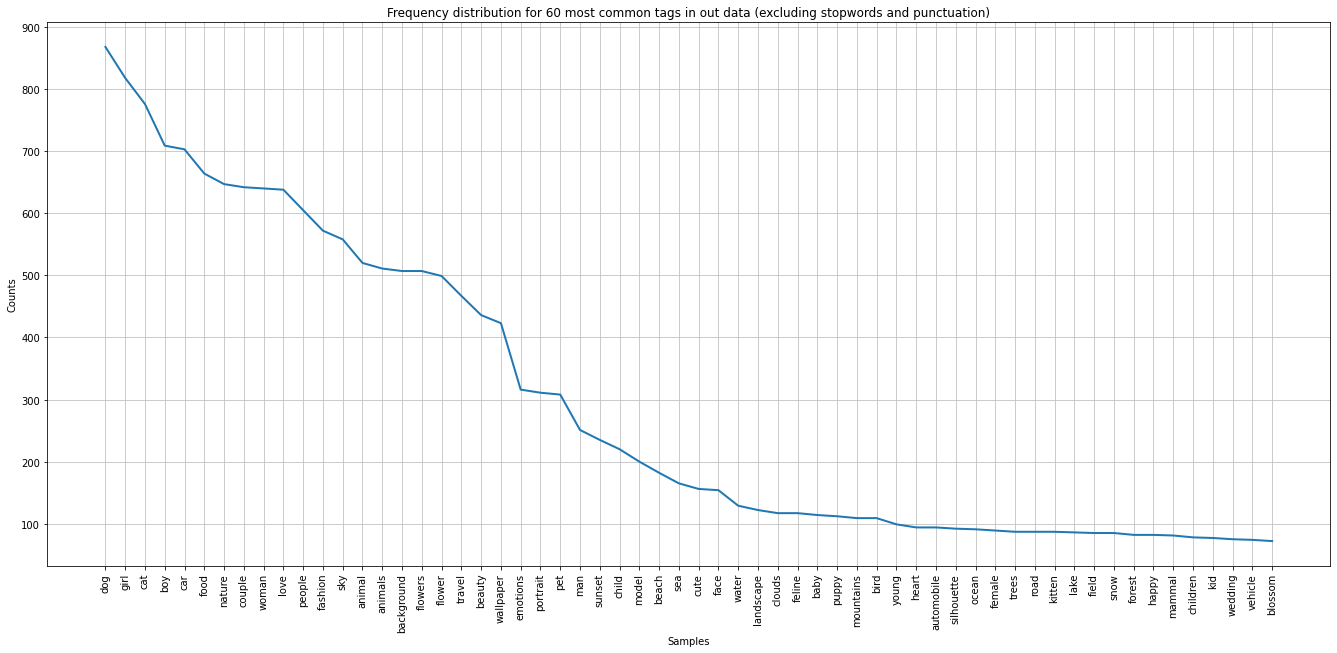

In [ ]:
fdist = FreqDist(total_tags)
fdist.plot(60, title = 'Frequency distribution for 60 most common tags in out data (excluding stopwords and punctuation)')

# Word Cloud of Tags in the data

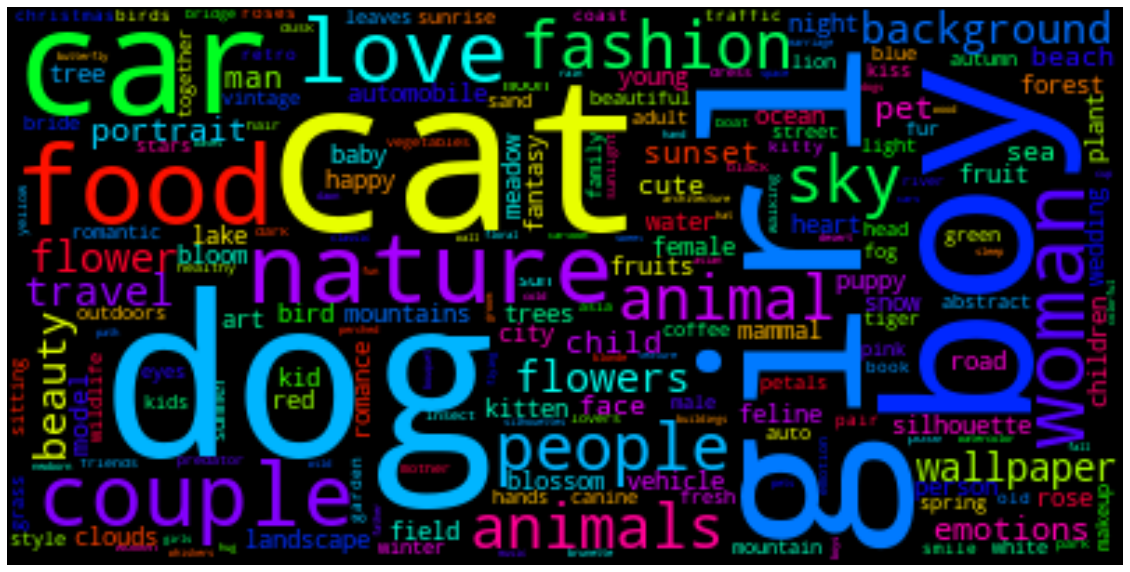

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(fdist)
plt.figure(figsize=(20,15))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Top 30 Most Common Tags

In [ ]:
fdist.most_common(30) # tags and its occurances

[('dog', 868),
 ('girl', 818),
 ('cat', 776),
 ('boy', 709),
 ('car', 703),
 ('food', 664),
 ('nature', 647),
 ('couple', 642),
 ('woman', 640),
 ('love', 638),
 ('people', 605),
 ('fashion', 572),
 ('sky', 558),
 ('animal', 520),
 ('animals', 511),
 ('background', 507),
 ('flowers', 507),
 ('flower', 499),
 ('travel', 467),
 ('beauty', 436),
 ('wallpaper', 423),
 ('emotions', 316),
 ('portrait', 311),
 ('pet', 308),
 ('man', 251),
 ('sunset', 235),
 ('child', 220),
 ('model', 200),
 ('beach', 182),
 ('sea', 165)]

### Lesser Common Tags

In [ ]:
fdist.most_common(3000)[775:800]

[('avian', 5),
 ('way', 5),
 ('pollination', 5),
 ('cottage', 5),
 ('dock', 5),
 ('village', 5),
 ('pathway', 5),
 ('ireland', 5),
 ('mystical', 5),
 ('burning', 5),
 ('church', 5),
 ('roar', 5),
 ('bright', 5),
 ('town', 5),
 ('raptor', 5),
 ('fly', 5),
 ('barley', 5),
 ('equine', 5),
 ('dry', 5),
 ('scenic', 5),
 ('surreal', 5),
 ('frozen', 5),
 ('pollen', 5),
 ('snowflakes', 5),
 ('liquid', 5)]

### From the Above Results we can see the most common and lesser common tags. 

### We can overserve that Beyond top 800 tags, the number of examples per tag is very less. If we consider these tags, it'll only add noise to our model. So we'll only consider top 800 tags.

In [ ]:
new_tagset = [tup[0] for tup in fdist.most_common(800)]
print(new_tagset[:20])

['dog', 'girl', 'cat', 'boy', 'car', 'food', 'nature', 'couple', 'woman', 'love', 'people', 'fashion', 'sky', 'animal', 'animals', 'background', 'flowers', 'flower', 'travel', 'beauty']


### Saving The New Tag Set and less common (rejected) list of Tags

In [ ]:
with open(dir_path + 'tagset.txt', 'w') as f:
  for tag in new_tagset:
    print(tag, file=f)

with open(dir_path + 'less_common_tags(not_considered).txt', 'w') as f:
  for tag in fdist.most_common(len(set(total_tags)))[801:]:
    print(tag, file=f)

## Making Dataset with tags

In [ ]:
import pandas as pd

In [ ]:
tagset = set(new_tagset)

new_img_tags = [[tag for tag in sorted(list(set(taglist))) if tag in tagset] for taglist in img_tags]

d = dict()
for l in new_img_tags:
  if len(l) in d:
    d[len(l)] += 1
  else:
    d[len(l)] = 1

stats = pd.DataFrame({
    'Number of Images' : d.values(),
    'Number of Tags per Image' : d.keys()
})

stats

Number of Images  Number of Tags per Image
0                993                         6
1                 50                         8
2                265                         7
3               1575                         4
4               1460                         5
5                710                         2
6               1203                         3
7                  1                        11
8                291                         1
9                  4                        10
10                11                         9
11                 1                        12

## Separating Training, Test Data and Full Data

In [ ]:
from sklearn.model_selection import train_test_split


#### Full Data

In [ ]:
full_df = pd.DataFrame({
    "Image Id" : img_ids,
    "Image URL" : img_urls,
    "Image Tags" : new_img_tags
})
full_df = full_df.reset_index(drop=True)

full_df.to_csv(dir_path + 'full_data.csv', index=False, encoding='utf-8')

full_df.head(10)

Image Id  ...                                         Image Tags
0    field-6574455__480.jpg  ...       [dawn, field, morning, nature, sky, sunrise]
1    avenue-815297__340.jpg  ...   [avenue, nature, path, sunbeams, sunrays, trees]
2     road-1072821__340.jpg  ...  [fall, forest, nature, path, road, trail, tree...
3  fantasy-2049567__340.jpg  ...  [background, butterflies, fantasy, forest, mus...
4     road-1072823__340.jpg  ...       [autumn, fall, forest, nature, road, season]
5     sand-6570980__340.jpg  ...                       [beach, dunes, nature, sand]
6   nature-6572635__340.jpg  ...          [field, meadow, nature, outdoors, sunset]
7    forest-931706__340.jpg  ...                      [forest, mist, nature, trees]
8   sunset-1373171__340.jpg  ...  [background, nature, silhouette, sky, sunset, ...
9   nature-6565499__340.jpg  ...        [beach, exploration, nature, outdoors, sky]

[10 rows x 3 columns]

#### Training and Test Data

In [ ]:
train, test = train_test_split(full_df, test_size=0.05, random_state=42)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)


In [ ]:
train.head(10)

Image Id  ...                                         Image Tags
0     distrust-6618287__340.jpg  ...                                   [emotions, teen]
1       reiter-3372907__340.jpg  ...                  [dawn, horse, sky, sunset, water]
2        forest-868715__340.jpg  ...       [forest, nature, outdoors, path, trees, way]
3    liverwort-3159876__340.jpg  ...                      [flower, flowers, wildflower]
4  hummingbird-5111260__340.jpg  ...               [animal, animals, bird, hummingbird]
5       people-2597454__340.jpg  ...  [cold, couple, love, man, people, weather, woman]
6       desert-1270345__340.jpg  ...                       [desert, dry, dunes, nature]
7        bindi-2416039__340.jpg  ...                           [asian, beauty, fashion]
8       bananas-575773__340.png  ...                                      [food, fruit]
9          crow-828944__340.jpg  ...             [animal, animals, bird, black, nature]

[10 rows x 3 columns]

In [ ]:
test.head(10)

Image Id  ...                                         Image Tags
0          dog-2832245__340.png  ...                                     [costume, dog]
1      oranges-1995056__340.jpg  ...                   [food, fruits, healthy, oranges]
2          car-6603726__340.jpg  ...                      [car, transportation, travel]
3   background-4991824__340.jpg  ...  [background, emotion, emotions, moonlight, nat...
4    halloween-2870607__340.jpg  ...                          [dog, halloween, pumpkin]
5      butterfly-95364__340.jpg  ...               [animals, butterfly, insect, nature]
6         wood-1866667__340.jpg  ...                [backdrop, background, floor, wood]
7       planet-2120004__340.jpg  ...                            [background, landscape]
8           boy-366311__340.jpg  ...                       [boy, face, figure, profile]
9  speedometer-1249610__340.jpg  ...                                       [car, speed]

[10 rows x 3 columns]

In [ ]:
print(f'Length of Train set : {len(train)}\nLength of Test set : {len(test)}')

Length of Train set : 6235
Length of Test set : 329


In [ ]:
train.to_csv(dir_path + 'train.csv', index=False, encoding='utf-8')
test.to_csv(dir_path + 'test.csv', index=False, encoding='utf-8')

## Downloading the Image Data

In [ ]:
import urllib.request

# Adding information about user agent
opener=urllib.request.build_opener()
opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
urllib.request.install_opener(opener)

### Downloading Training Data

In [ ]:
def image_download(row, folder):
  filename = dir_path + folder + '/' + row[0]
  img_url = row[1] 
  try:
    urllib.request.urlretrieve(img_url, filename)
  except Exception as e:
    print(e)
    print(row)
  return row


In [ ]:
# Run Only Once
train.apply(lambda row : image_download(row, "train_images"), axis=1)

HTTP Error 404: Not Found
Image Id                                   van-6566180__340.jpg
Image URL     https://cdn.pixabay.com/photo/2021/08/22/21/15...
Image Tags                      [bus, car, van, volkswagen, vw]
Name: 1192, dtype: object
<urlopen error unknown url type: ﻿https>
Image Id                                 field-6574455__480.jpg
Image URL     ﻿https://cdn.pixabay.com/photo/2021/08/25/20/4...
Image Tags         [dawn, field, morning, nature, sky, sunrise]
Name: 2999, dtype: object


Image Id  ...                                      Image Tags
0        distrust-6618287__340.jpg  ...                                [emotions, teen]
1          reiter-3372907__340.jpg  ...               [dawn, horse, sky, sunset, water]
2           forest-868715__340.jpg  ...    [forest, nature, outdoors, path, trees, way]
3       liverwort-3159876__340.jpg  ...                   [flower, flowers, wildflower]
4     hummingbird-5111260__340.jpg  ...            [animal, animals, bird, hummingbird]
...                            ...  ...                                             ...
6230          farm-972717__340.jpg  ...                      [clouds, farm, field, sky]
6231         love-1302202__340.png  ...  [animals, birds, couple, flying, hearts, love]
6232         love-4126181__340.jpg  ...      [couple, fantasy, heart, love, silhouette]
6233      butterfly-44882__340.jpg  ...            [animal, animals, butterfly, insect]
6234      bicycle-3045580__340.jpg  ...            [art, background, bicycle, children]

[6235 rows x 3 columns]

In [ ]:
# Run Only Once
test.apply(lambda row : image_download(row, "test_images"), axis=1)

Image Id  ...                                         Image Tags
0           dog-2832245__340.png  ...                                     [costume, dog]
1       oranges-1995056__340.jpg  ...                   [food, fruits, healthy, oranges]
2           car-6603726__340.jpg  ...                      [car, transportation, travel]
3    background-4991824__340.jpg  ...  [background, emotion, emotions, moonlight, nat...
4     halloween-2870607__340.jpg  ...                          [dog, halloween, pumpkin]
..                           ...  ...                                                ...
324         dog-3644029__340.png  ...                      [animal, cartoon, comic, dog]
325        flower-52358__340.jpg  ...       [flower, flowers, petals, plant, wildflower]
326      sunset-3195637__340.jpg  ...                    [dawn, dusk, sky, sunset, tree]
327      barbie-3599654__340.jpg  ...                          [beauty, childhood, face]
328         city-438393__340.jpg  ...               [city, crowd, people, street, urban]

[329 rows x 3 columns]

# Image Feature Extraction

In [ ]:
import os
from os import listdir
from matplotlib import pyplot as plt
%matplotlib inline
import keras
import numpy as np
import pickle
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.layers import Input, Dropout, Dense, Embedding
from keras.models import Model

In [ ]:
def get_features(img_dir):
  model = InceptionV3()
  model = Model(inputs = model.inputs, outputs = model.layers[-2].output)
  img_features = {}
  for imgname in listdir(img_dir):
    img_path = img_dir + imgname
    image = load_img(img_path, target_size = (299,299))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image)
    imgname = imgname.split('.')[0]
    img_features[imgname] = feature
  return img_features

train_img_dir = dir_path + 'train_images/'
test_img_dir = dir_path + 'test_images/'

In [ ]:
#Run Only Once
test_img_features = get_features(test_img_dir)
print('Test Image Features length : ' + str(len(test_img_features)))

pickle.dump(test_img_features,open(dir_path + 'test_img_features.pickle', 'wb'))

96124928/96112376 [==============================] - 1s 0us/step
Test Image Features length : 329


In [ ]:
#Run Only Once
train_img_features = get_features(train_img_dir)
print('Train Image Features length : ' + str(len(train_img_features)))

pickle.dump(train_img_features,open(dir_path + 'train_img_features.pickle', 'wb'))

Train Image Features length : 6235


In [ ]:
vocab = new_tagset
maxrel = 12  # maximum number of tags in an image
maxirrel = 800
print(vocab[:15])

['dog', 'girl', 'cat', 'boy', 'car', 'food', 'nature', 'couple', 'woman', 'love', 'people', 'fashion', 'sky', 'animal', 'animals']


In [ ]:
# Run Only Once
# Building Word to Index, and Index to Word tokenizer
wordtoix, ixtoword = dict(), dict()
ix = 1
for w in vocab:
  wordtoix[w] = ix
  ixtoword[ix] = w
  ix += 1

# Saving wordtoix and ixtoword tokenizers
pickle.dump(wordtoix, open(dir_path + 'wordtoix.pickle', 'wb'))
pickle.dump(ixtoword, open(dir_path + 'ixtoword.pickle', 'wb'))

In [ ]:
wordtoix = pickle.load(open(dir_path + 'wordtoix.pickle', 'rb'))
ixtoword = pickle.load(open(dir_path + 'ixtoword.pickle', 'rb'))
vocab_size = len(ixtoword) + 1   # +1 for 0's padding
train_img_features = pickle.load(open(dir_path + 'train_img_features.pickle', 'rb'))

In [ ]:
train_df = pd.read_csv(dir_path + 'train.csv')

In [ ]:
def prepareDataset(df, img_features_dict, wordtoix):
  x, yp, yn, n_yp, n_yn = [], [], [], [], []

  def getImgFeature(row):
    img_name = row[0].split('.')[0]
    tag_list = [x.strip()[1:-1] for x in row[2][1 : -1].split(',')]

    x.append(img_features_dict[img_name][0])
    ptags = [wordtoix[t] for t in tag_list]
    ntags = [wordtoix[t] for t in vocab if t not in tag_list]
    n_p, n_n = len(ptags), len(ntags)

    ptags = pad_sequences([ptags], padding = 'post', maxlen = maxrel)[0]
    ntags = pad_sequences([ntags], padding = 'post', maxlen = maxirrel)[0]

    yp.append(ptags)
    yn.append(ntags)
    n_yp.append(n_p)
    n_yn.append(n_n)

    return row

  df.apply(lambda row : getImgFeature(row), axis=1)

  return x, yp, yn, n_yp, n_yn 


In [ ]:
xtrain, yp_train, yn_train, n_yp_train, n_yn_train = prepareDataset(train_df, train_img_features, wordtoix)

In [ ]:
xtrain = np.asarray(xtrain)
yp_train = np.asarray(yp_train)
yn_train = np.asarray(yn_train)
n_yp_train = np.asarray(n_yp_train)
n_yn_train = np.asarray(n_yn_train)


xtrain = np.reshape(xtrain, (-1, 2048))
yp_train = np.reshape(yp_train, (-1, maxrel))
yn_train = np.reshape(yn_train, (-1, maxirrel))
n_yp_train = np.reshape(n_yp_train, (-1, 1))
n_yn_train = np.reshape(n_yn_train, (-1, 1))

In [ ]:
print(xtrain.shape, yp_train.shape, yn_train.shape, n_yp_train.shape, n_yn_train.shape)

(6235, 2048) (6235, 12) (6235, 800) (6235, 1) (6235, 1)


In [ ]:
# making minibatches of size batch_size

batch_size = 64
train_dataset = tf.data.Dataset.from_tensor_slices((xtrain, yp_train, yn_train, n_yp_train, n_yn_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

In [ ]:
# Run only Once
# Loading Glove Embedding
glove_path = '/content/gdrive/My Drive/Colab Notebooks/Image Captioning/' + 'glove.6B.200d.txt'
embedding_index = dict()
with open(glove_path, encoding = 'utf-8') as f:
  for line in f:
    value = line.split()
    word, coeff = value[0], value[1:]
    embedding_index[word] = np.asarray(coeff, dtype = 'float32')
print('Number of Word vector :', len(embedding_index))

Number of Word vector : 400000


In [ ]:
# Run only once
# Making Embedding Matrix
emb_dim = 200
embedding_matrix = np.zeros((vocab_size, emb_dim))
for word, ix in wordtoix.items():
  if word in embedding_index:
    embedding_matrix[ix] = embedding_index[word]

print('Embedding Matrix Shape :', embedding_matrix.shape)

Embedding Matrix Shape : (801, 200)


## Embedding Layers

In [ ]:
# Relevant tags embedding
embedding_rel = Embedding(vocab_size, 200, input_length=maxrel, embeddings_initializer=keras.initializers.Constant(embedding_matrix), trainable=False)
embedding_irrel = Embedding(vocab_size, 200, input_length=maxirrel, embeddings_initializer=keras.initializers.Constant(embedding_matrix), trainable=False)


## Model Building

In [ ]:
input_img = Input(shape=(2048,))

img = Dense(1024, activation = 'relu')(input_img)
img = Dense(512, activation = 'relu')(img)
img = Dropout(0.3)(img)
output = Dense(200)(img)

model = Model(inputs = [input_img], outputs = [output])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2048)]            0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               102600    
Total params: 2,725,576
Trainable params: 2,725,576
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
optimizer = tf.keras.optimizers.Adam()

def loss_fn(pdirs_batch, yp_batch, yn_batch, nyp_batch, nyn_batch):
  total_loss = 0

  for (pdir, yp, yn, nyp, nyn) in zip(pdirs_batch, yp_batch, yn_batch, nyp_batch, nyn_batch):

    yp, yn = yp[:nyp[0]], yn[:nyn[0]]
    pdir = tf.reshape(pdir, (-1, 200))

    lp = pdir @ tf.transpose(yp)
    ln = pdir @ tf.transpose(yn)

    lp = tf.reshape(lp, (-1))
    ln = tf.reshape(ln, (-1))

    lnp = ln[None, :] - lp[:, None]

    loss = tf.reduce_sum(tf.math.log(1 + tf.math.exp(lnp))) / tf.cast(nyp[0] * nyn[0], tf.float32)

    total_loss += loss
  
  return total_loss

In [ ]:
epochs = 30
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))

  for step, (x_batch_train, yp_batch_train, yn_batch_train, n_yp_batch_train, n_yn_batch_train) in enumerate(train_dataset):

    with tf.GradientTape() as tape:

      principle_dirs = model(x_batch_train, training = True)
      yp_embedded = embedding_rel(yp_batch_train)
      yn_embedded = embedding_irrel(yn_batch_train)

      loss_value = loss_fn(principle_dirs, yp_embedded, yn_embedded, n_yp_batch_train, n_yn_batch_train)
    
    grads = tape.gradient(loss_value, model.trainable_weights)

    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    if(step % 50 == 0):
      print("Training Loss (for one batch) at step %d : %.4f" % (step, float(loss_value)))
      print("Seen so far: %s samples" % ((step + 1) * 64))
      print('\n')

  print('---------------------------------------------------------------------------------------------------------------------------------\n')

  model.save(dir_path + 'Models/model_' + str(epoch) + '.h5')


Start of epoch 0
Training Loss (for one batch) at step 0 : 103.8285
Seen so far: 64 samples


Training Loss (for one batch) at step 50 : 19.3949
Seen so far: 3264 samples


---------------------------------------------------------------------------------------------------------------------------------


Start of epoch 1
Training Loss (for one batch) at step 0 : 15.6158
Seen so far: 64 samples


Training Loss (for one batch) at step 50 : 13.0576
Seen so far: 3264 samples


---------------------------------------------------------------------------------------------------------------------------------


Start of epoch 2
Training Loss (for one batch) at step 0 : 12.6317
Seen so far: 64 samples


Training Loss (for one batch) at step 50 : 12.4147
Seen so far: 3264 samples


---------------------------------------------------------------------------------------------------------------------------------


Start of epoch 3
Training Loss (for one batch) at step 0 : 11.7587
Seen so far: 64 sam

## Testing

### Preparing Test Set

In [ ]:
test_img_features = pickle.load(open(dir_path + 'test_img_features.pickle', 'rb'))

test_df = pd.read_csv(dir_path + 'test.csv')

xtest, yp_test, yn_test, n_yp_test, n_yn_test = prepareDataset(test_df, test_img_features, wordtoix)

xtest = np.asarray(xtest)
yp_test = np.asarray(yp_test)
yn_test = np.asarray(yn_test)
n_yp_test = np.asarray(n_yp_test)
n_yn_test = np.asarray(n_yn_test)


xtest = np.reshape(xtest, (-1, 2048))
yp_test = np.reshape(yp_test, (-1, maxrel))
yn_test = np.reshape(yn_test, (-1, maxirrel))
n_yp_test = np.reshape(n_yp_test, (-1, 1))
n_yn_test = np.reshape(n_yn_test, (-1, 1))


batch_size = 64
test_dataset = tf.data.Dataset.from_tensor_slices((xtest, yp_test, yn_test, n_yp_test, n_yn_test))
test_dataset = test_dataset.shuffle(buffer_size=1024).batch(batch_size)

In [ ]:
model_list = []
model_loss = []

In [ ]:
## Testing each of our trained model against the test set

for model_num in range(30):
  _model = keras.models.load_model(f'{dir_path}Models/model_{model_num}.h5', compile=False)
  avg_total_loss, loss, batch_num = 0, 0, 0

  for (x_batch_test, yp_batch_test, yn_batch_test, n_yp_batch_test, n_yn_batch_test) in test_dataset:
    principle_dirs = _model.predict(x_batch_test)

    yp_embedded = embedding_rel(yp_batch_test)
    yn_embedded = embedding_irrel(yn_batch_test)

    loss_value = loss_fn(principle_dirs, yp_embedded, yn_embedded, n_yp_batch_test, n_yn_batch_test)
    loss += loss_value
    batch_num += 1
  
  avg_total_loss = loss / batch_num

  model_list.append(model_num)
  model_loss.append(float(avg_total_loss))



In [ ]:
result_df = pd.DataFrame({
    'Model_Num' : model_list,
    'Model_Loss' : model_loss
})

result_df

Model_Num  Model_Loss
0           0   14.547744
1           1   12.318264
2           2   11.773731
3           3   10.349154
4           4   10.150437
5           5    9.866980
6           6    9.560224
7           7    9.762082
8           8    9.339110
9           9    9.586052
10         10    9.757224
11         11   10.024734
12         12    9.902507
13         13    9.671430
14         14    9.798664
15         15    9.823188
16         16    9.948483
17         17    9.682240
18         18   10.428748
19         19   10.041550
20         20   10.878407
21         21   11.381503
22         22   10.981927
23         23   11.053681
24         24   11.250678
25         25   11.014752
26         26   11.201096
27         27   12.060296
28         28   11.367607
29         29   12.013789

We can see that the model with least loss is 8th model, after that the model overfits

## Inference

In [ ]:
# Run once during prediction
img_model = InceptionV3()
img_model = Model(inputs = img_model.inputs, outputs = img_model.layers[-2].output)

embedding_test = Embedding(vocab_size, 200, input_length=800, embeddings_initializer=keras.initializers.Constant(embedding_matrix), trainable=False)

96124928/96112376 [==============================] - 2s 0us/step


In [ ]:
def predictTags(finalmodel, image, alltags, wordtoix, word_embedding, taglimit):
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  feature = img_model.predict(image)

  pdir = finalmodel.predict(feature)
  pdir = np.reshape(pdir, (-1, 200))

  tags_encoded = [wordtoix[x] for x in alltags]

  tags_encoded = np.asarray(tags_encoded)
  tags_encoded = np.reshape(tags_encoded, (-1, len(alltags)))
  tags_embedded = word_embedding(tags_encoded)[0]


  inner_pro = pdir @ tf.transpose(tags_embedded)
  inner_pro = inner_pro.numpy().ravel().tolist()

  ranked_tags = list(list(zip(*sorted(zip(inner_pro, alltags), reverse = True)))[1])

  top_tags = ranked_tags[:taglimit]
  return top_tags

In [ ]:
finalmodel = keras.models.load_model(f'{dir_path}Models/model_8.h5', compile=False)

Top Tags :  ['travel', 'sky', 'city', 'interior', 'background', 'buildings', 'architecture', 'skyline', 'transportation', 'bridge']


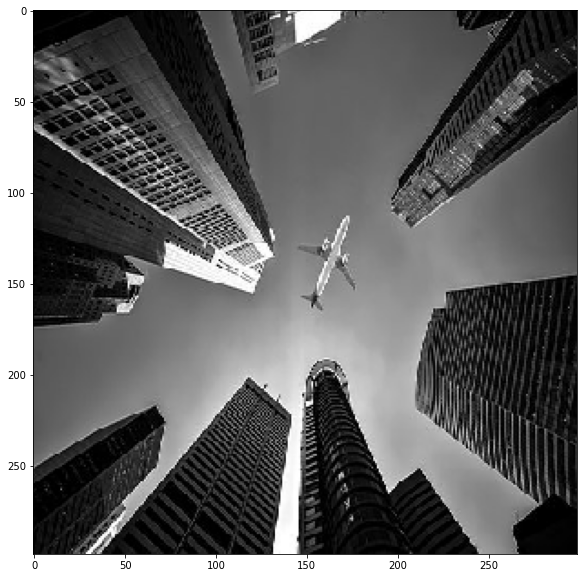

In [ ]:
image_path = dir_path + 'train_images/' + 'airplane-1807486__340.jpg'
image = load_img(image_path, target_size = (299,299))
plt.imshow(image)
top_tags = predictTags(finalmodel, image, vocab, wordtoix, embedding_test, 10)
print('Top Tags : ', top_tags)

Top Tags :  ['colors', 'floral', 'portrait', 'background', 'wallpaper', 'abstract', 'art', 'painting', 'pink', 'white']


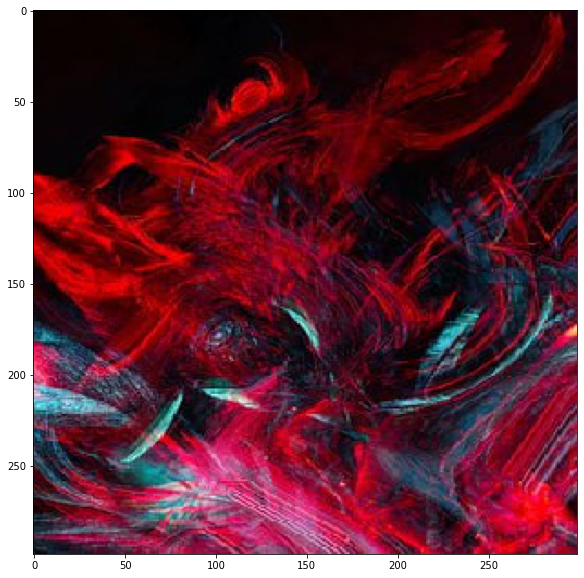

In [ ]:
image_path = dir_path + 'train_images/' + 'abstract-5985788__340.jpg'
image = load_img(image_path, target_size = (299,299))
plt.imshow(image)
top_tags = predictTags(finalmodel, image, vocab, wordtoix, embedding_test, 10)
print('Top Tags : ', top_tags)

Top Tags :  ['boy', 'girl', 'children', 'kids', 'child', 'son', 'kid', 'young', 'father', 'girls']


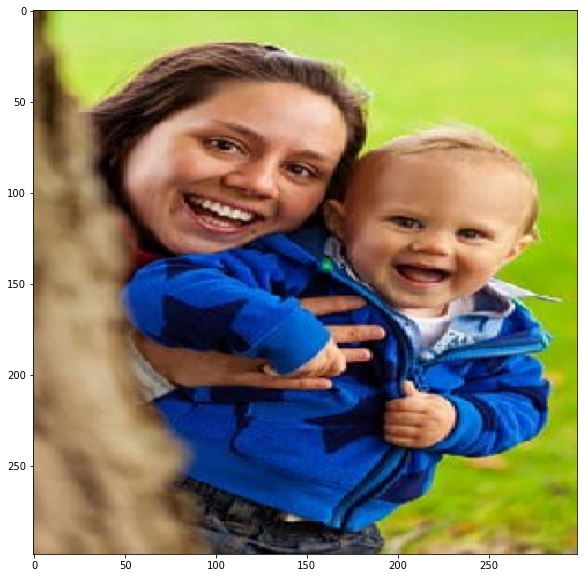

In [ ]:
image_path = dir_path + 'test_images/' + 'baby-72224__340.jpg'
image = load_img(image_path, target_size = (299,299))
plt.imshow(image)
top_tags = predictTags(finalmodel, image, vocab, wordtoix, embedding_test, 10)
print('Top Tags : ', top_tags)

Top Tags :  ['forest', 'trees', 'path', 'tree', 'foliage', 'nature', 'trail', 'wallpaper', 'landscape', 'road']


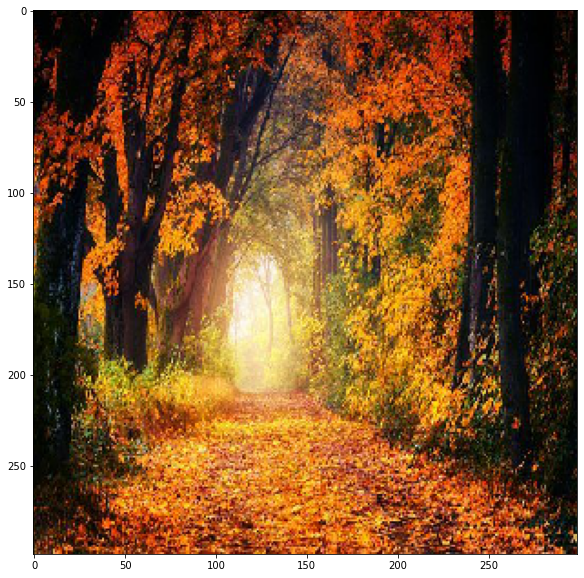

In [ ]:
image_path = dir_path + 'test_images/' + 'autumn-3186876__340.jpg'
image = load_img(image_path, target_size = (299,299))
plt.imshow(image)
top_tags = predictTags(finalmodel, image, vocab, wordtoix, embedding_test, 10)
print('Top Tags : ', top_tags)

Top Tags :  ['background', 'landscape', 'sky', 'wallpaper', 'nature', 'winter', 'hill', 'snow', 'interior', 'castle']


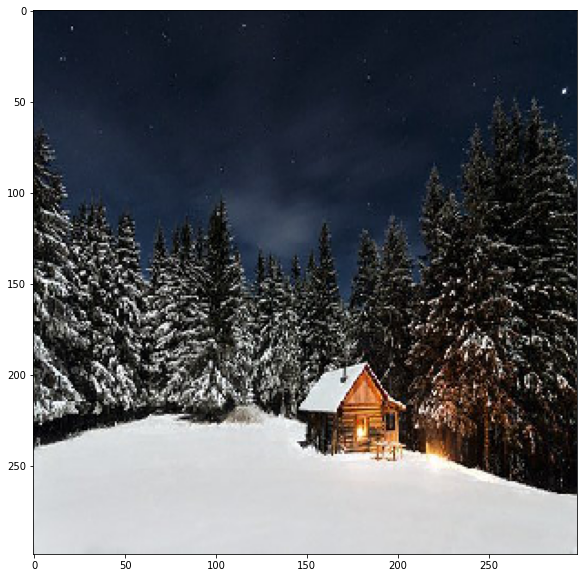

In [ ]:
image_path = dir_path + 'test_images/' + 'cabin-1082058__340.jpg'
image = load_img(image_path, target_size = (299,299))
plt.imshow(image)
top_tags = predictTags(finalmodel, image, vocab, wordtoix, embedding_test, 10)
print('Top Tags : ', top_tags)

Top Tags :  ['food', 'fruits', 'fruit', 'fresh', 'tomatoes', 'raw', 'raspberries', 'ripe', 'apple', 'vegetables']


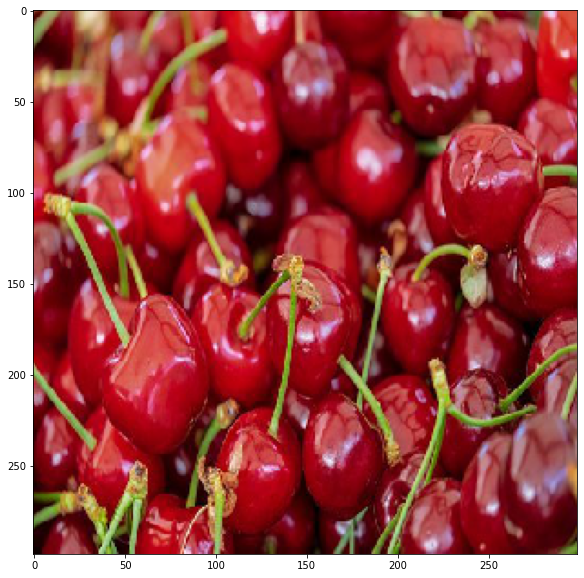

In [ ]:
image_path = dir_path + 'test_images/' + 'cherries-3433775__340.jpg'
image = load_img(image_path, target_size = (299,299))
plt.imshow(image)
top_tags = predictTags(finalmodel, image, vocab, wordtoix, embedding_test, 10)
print('Top Tags : ', top_tags)

Top Tags :  ['dog', 'puppy', 'pet', 'cat', 'animal', 'dogs', 'animals', 'furry', 'pets', 'kitten']


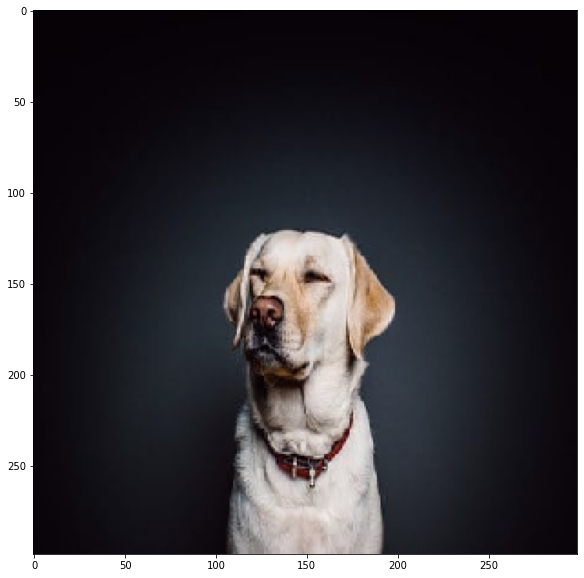

In [ ]:
image_path = dir_path + 'test_images/' + 'dog-820014__340.jpg'
image = load_img(image_path, target_size = (299,299))
plt.imshow(image)
top_tags = predictTags(finalmodel, image, vocab, wordtoix, embedding_test, 10)
print('Top Tags : ', top_tags)

Top Tags :  ['animals', 'animal', 'elephant', 'wildlife', 'male']


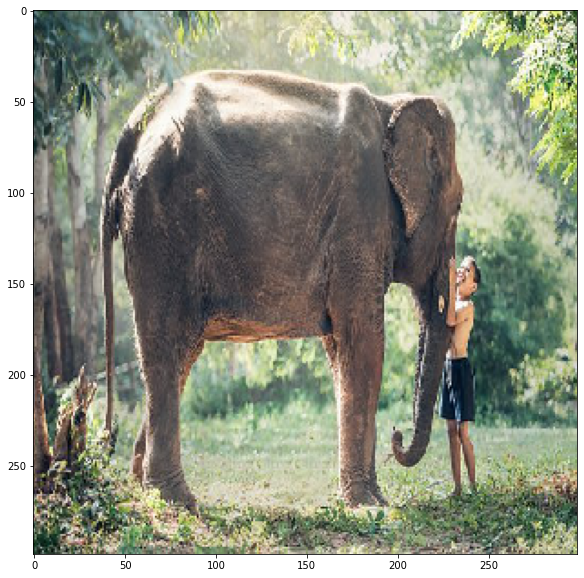

In [ ]:
image_path = dir_path + 'test_images/' + 'elephant-1822492__340.jpg'
image = load_img(image_path, target_size = (299,299))
plt.imshow(image)
top_tags = predictTags(finalmodel, image, vocab, wordtoix, embedding_test, 5)
print('Top Tags : ', top_tags)

Top Tags :  ['dog', 'animal', 'love', 'boy', 'girl', 'cat', 'puppy', 'couple', 'child', 'mother']


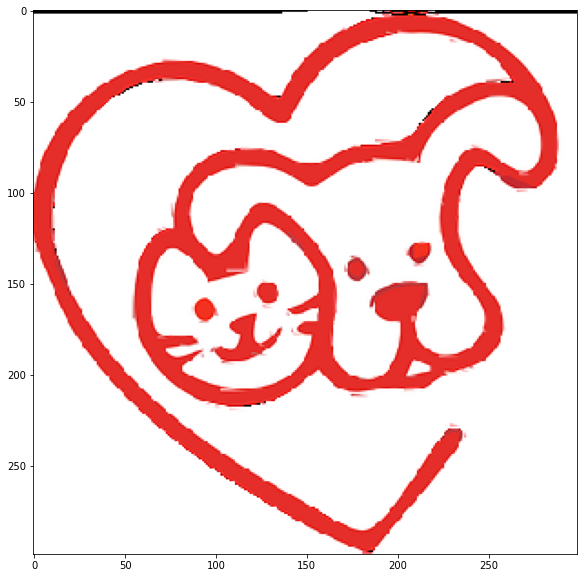

In [ ]:
image_path = dir_path + 'train_images/' + 'animal-1295976__340.png'
image = load_img(image_path, target_size = (299,299))
plt.imshow(image)
top_tags = predictTags(finalmodel, image, vocab, wordtoix, embedding_test, 10)
print('Top Tags : ', top_tags)

## Testing The Model on a new unseen tag

In [ ]:
## We can see that Tasty tag doesn't exist in existing vocab
if 'tasty' in vocab:
  print("'tasty' tag is present in existing vocab")
else:
  print("'tasty' tag is not present in existing vocab")

'tasty' tag is not present in existing vocab


In [ ]:
# Making new Vocab by adding 'tasty' tag to it
new_vocab = vocab + ['tasty']

# New wordtoix mapping
new_wordtoix, i = {}, 1
for word in new_vocab:
  new_wordtoix[word] = i
  i += 1

new_vocab_size = len(new_wordtoix) + 1

# New Embedding Matrix
emb_dim = 200
new_embedding_matrix = np.zeros((new_vocab_size, emb_dim))
for word, ix in new_wordtoix.items():
  if word in embedding_index:
    new_embedding_matrix[ix] = embedding_index[word]


#New word embedding 
new_embedding_test = Embedding(new_vocab_size, 200, input_length=new_vocab_size, embeddings_initializer=keras.initializers.Constant(new_embedding_matrix), trainable=False)


Top Tags :  ['food', 'vegetables', 'meal', 'salad', 'cheese', 'tasty', 'meat', 'dish', 'noodles', 'vegetable']


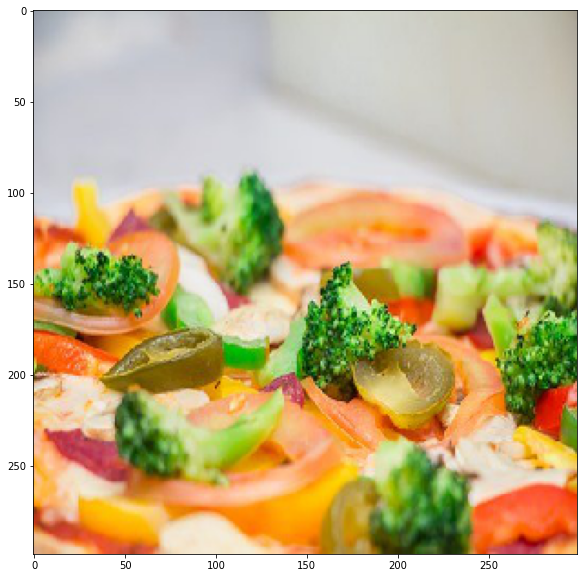

In [ ]:
image_path = dir_path + 'train_images/' + 'pizza-346985__340.jpg'
image = load_img(image_path, target_size = (299,299))
plt.imshow(image)
top_tags = predictTags(finalmodel, image, new_vocab, new_wordtoix, new_embedding_test, 10)
print('Top Tags : ', top_tags)

Top Tags :  ['food', 'meal', 'pizza', 'salad', 'tasty', 'noodles', 'cheese', 'vegetables', 'bread', 'cooking']


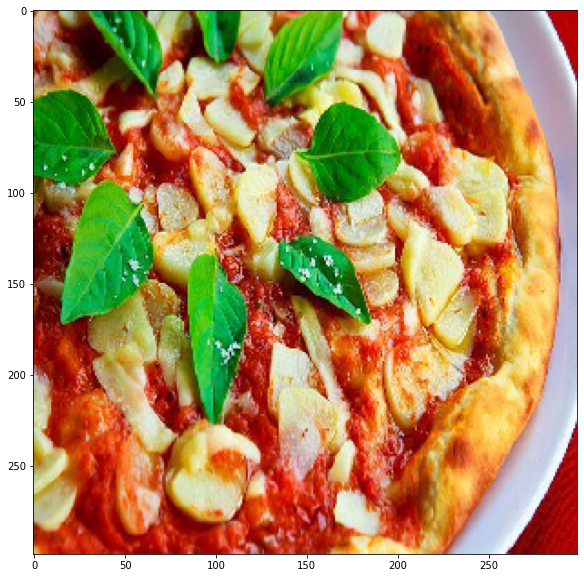

In [ ]:
image_path = dir_path + 'train_images/' + 'pizza-1209748__340.jpg'
image = load_img(image_path, target_size = (299,299))
plt.imshow(image)
top_tags = predictTags(finalmodel, image, new_vocab, new_wordtoix, new_embedding_test, 10)
print('Top Tags : ', top_tags)

Top Tags :  ['food', 'breakfast', 'meal', 'bread', 'cake', 'vegetables', 'dessert', 'raw', 'salad', 'beans', 'coffee', 'fruits', 'cooking', 'cheese', 'sweet', 'noodles', 'vegetable', 'pasta', 'bowl', 'eat', 'cereals', 'spices', 'ingredients', 'fresh', 'garlic', 'pastries', 'berries', 'tasty', 'tomatoes', 'fruit']


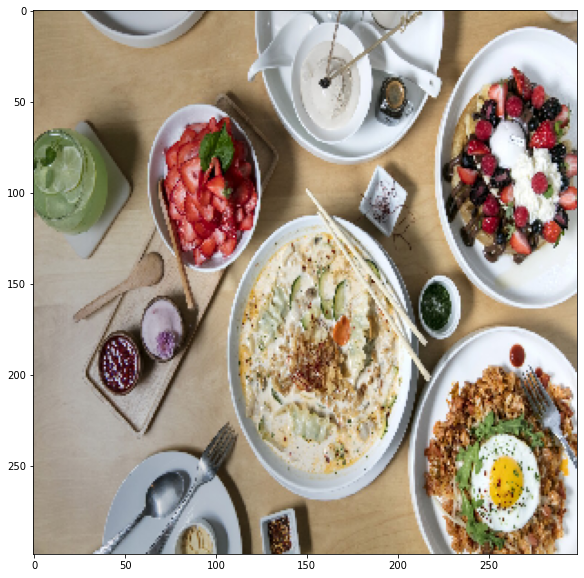

In [ ]:
image_path = dir_path + 'food.jpg'
image = load_img(image_path, target_size = (299,299))
plt.imshow(image)
top_tags = predictTags(finalmodel, image, new_vocab, new_wordtoix, new_embedding_test, 30)
print('Top Tags : ', top_tags)

**Thus we can see that our model is also able to rank tags which it hasn't seen before (like the tag 'tasty') if the new word is similar to one of the words in our training vocab.**

**Here the model is able to rank the tag 'tasty' properly because it is similar to the tags 'food', 'vegetables', 'pizza', 'cake', etc...**